#Data Preprocessing

Importing the libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing the dataset

In [4]:
dataset_train=pd.read_csv("Google_Stock_Price_Train.csv")

In [5]:
training_set=dataset_train.iloc[:,1:2].values

In [6]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

Feature Scaling

In [7]:
#Normalisation
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)

In [8]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

Creating a data structure with 60 timesteps and 1 output

In [9]:
X_train=[]
y_train=[]
for i in range(60,1258):
  X_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)

In [10]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [11]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

Reshaping

In [12]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [13]:
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

#Building the RNN

Importing the Keras libraries and packages

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Initialize the RNN

In [15]:
regressor=Sequential()

Adding the first LSTM layer and some Dropout regularization

In [16]:
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

Adding a second LSTM layer and some Dropout Regularization

In [17]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

Adding a third LSTM layer and some Dropout Regularization

In [18]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

Adding a fourth LSTM layer and some Dropout Regularization

In [19]:
regressor.add(LSTM(units=50,return_sequences=False))
regressor.add(Dropout(0.2))

Adding the output layer

In [20]:
regressor.add(Dense(units=1))

Compiling the RNN

In [21]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

Fitting the RNN to the Training set

In [22]:
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 12s 126ms/step - loss: 0.0365
Epoch 2/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0063
Epoch 3/100
38/38 [==============================] - 5s 125ms/step - loss: 0.0047
Epoch 4/100
38/38 [==============================] - 5s 125ms/step - loss: 0.0054
Epoch 5/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0048
Epoch 6/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0045
Epoch 7/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0045
Epoch 8/100
38/38 [==============================] - 5s 125ms/step - loss: 0.0043
Epoch 9/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0049
Epoch 10/100
38/38 [==============================] - 5s 126ms/step - loss: 0.0040
Epoch 11/100
38/38 [==============================] - 5s 125ms/step - loss: 0.0040
Epoch 12/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0040
Epoch 13/100

#Part-3 Making the Predictions and Visualizing the Result

Getting the real stock price

In [23]:
dataset_test=pd.read_csv("Google_Stock_Price_Test.csv")
Real_Stock_Price=dataset_test.iloc[:,1:2].values

Getting the predicted stock price 

In [26]:
dataset_total=pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)

In [27]:
X_test=[]
for i in range(60,len(inputs)):
  X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)

Reshaping

In [28]:
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

Prediction

In [29]:
predicted_stock_price=regressor.predict(X_test)

Inverse the scaling

In [30]:
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

In [31]:
predicted_stock_price

array([[797.11334],
       [794.398  ],
       [794.41473],
       [795.637  ],
       [798.7204 ],
       [804.19385],
       [809.32446],
       [811.5796 ],
       [812.06226],
       [811.9751 ],
       [811.91003],
       [811.8582 ],
       [811.8513 ],
       [812.421  ],
       [813.3284 ],
       [817.5303 ],
       [823.94196],
       [830.9239 ],
       [834.88904],
       [831.4062 ]], dtype=float32)

Visualising the results

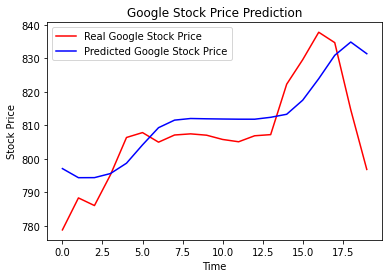

In [32]:
plt.plot(Real_Stock_Price,color="Red",label="Real Google Stock Price")
plt.plot(predicted_stock_price,color="Blue",label="Predicted Google Stock Price")
plt.title('Google Stock Price Prediction')
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()